In [1]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicH")

In [2]:

import elastic
import potentials
import constants
import spinexchange
import dipolelosses
import numpy as np
import pylab as plt
from dipolelosses import DipoleChannels



In [3]:

r0       = 1e-9
pin      = 1e-4
intlimit = 100 * constants.BohrInAng/constants.hcInEVAngstrom
rhos = np.linspace(r0, intlimit, 100)


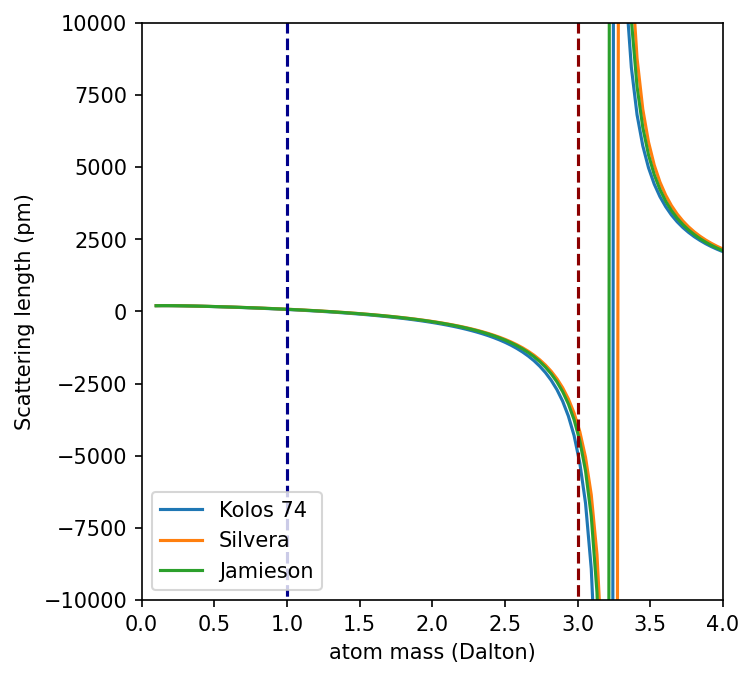

In [4]:
ms=np.linspace(0.1,4,100)
plt.figure(figsize=(5,5),dpi=150)
for trip in potentials.Triplets.keys():
    aVsM=[]
    for m in ms:
        mu=m*constants.DaltonInEV/2
        aVsM.append(elastic.GetScatteringLength(rhos, pin, 0, mu, potentials.Triplets[trip], 'Radau')[-1]*constants.hcInEVAngstrom*100)
    plt.plot(ms,aVsM,label=trip)
plt.xlabel("atom mass (Dalton)")
plt.ylabel("Scattering length (pm)")
plt.plot([1,1],[-100000,45000],'--',color='DarkBlue')
plt.plot([3,3],[-100000,45000],'--',color='DarkRed')
plt.ylim(-10000,10000)
plt.xlim(0,4)
plt.legend(loc='lower left')

/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/dipolelosses.py:66: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)
/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/spinbasis.py:283: RuntimeWarning: divide by zero encountered in matmul
  Rets[m]=TransformMatrix(np.matmul(np.matmul(TripletProj,SigMatrix),TripletProj),Rotator)
/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/spinbasis.py:283: RuntimeWarning: overflow encountered in matmul
  Ret

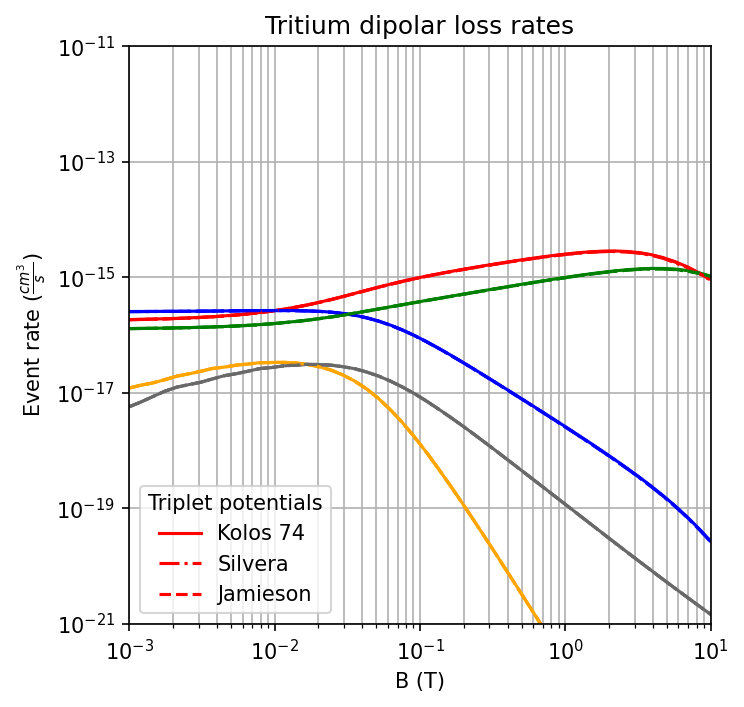

In [5]:
B_values = np.logspace(-3,1,50)
pot      = potentials.Silvera_Triplet
T        = 5e-4

colors=['red','blue','green','orange','dimgrey']
linetypes=['-','-.','--',':']
plt.figure(figsize=(5,5),dpi=150)

pi=0
for pot in potentials.Triplets.keys():
    TripletPotential=potentials.Triplets[pot]
    ci=0
    for c in DipoleChannels:
        LossesT=[]
        for B in B_values:
            LossesT.append(dipolelosses.GetGFactor(c,  B, constants.HydrogenConstants(), T, potentials.Triplets[pot],rhos=np.linspace(1e-9,0.75,2000)))
        if(ci==0):
            plt.plot(B_values,LossesT,linetypes[pi],color=colors[ci],label=pot)
        else:
            plt.plot(B_values,LossesT,linetypes[pi],color=colors[ci])
        ci=ci+1
    pi=pi+1
plt.xlabel("B (T)")
plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.ylim(1e-21, 1e-11)
plt.title("Tritium dipolar loss rates")
plt.grid(which='both')
plt.legend(loc='lower left',title='Triplet potentials')
plt.loglog()
plt.show()

In [6]:
B_values = np.logspace(-3,1,50)
SingletPotential     = potentials.Kolos_Singlet2_VDW
T        = 1e-5
Channels = [ ['a','a'],
             ['a','c'],
             ['b','d']]
colors=['red','blue','green']
linetypes=['-','-.','--',':']

plt.figure(figsize=(5,5),dpi=150)

pi=0
for pot in potentials.Triplets.keys():
    TripletPotential=potentials.Triplets[pot]
    ci=0
    for c in Channels:

        LossesT=spinexchange.GetGFactor(alpha='c',beta='c',alphaprime=c[0],betaprime=c[1],which='T', B_values=B_values,triplet_potential=TripletPotential,singlet_potential=SingletPotential,temp=T)
        if(ci==0):
            plt.plot(B_values,LossesT,linetypes[pi],color=colors[ci],label=pot)
        else:
            plt.plot(B_values,LossesT,linetypes[pi],color=colors[ci])
        ci=ci+1
    pi=pi+1
plt.xlabel("B (T)")
plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.title("Tritium Spin Exchange rates")
plt.grid(which='both')
plt.legend(loc='lower left',title='Triplet potentials')
plt.loglog()
plt.show()

TypeError: GetGFactor() got an unexpected keyword argument 'alpha'

<Figure size 750x750 with 0 Axes>

In [7]:
B_values = np.logspace(-3,1,50)
TripletPotential  = potentials.Silvera_Triplet

T        = 1e-5
Channels = [ ['a','a'],
             ['a','c'],
             ['b','d']]
colors=['red','blue','green']
linetypes=['-','-.','--',':']

plt.figure(figsize=(5,5),dpi=150)

pi=0
for pot in potentials.Singlets.keys():
    SingletPotential=potentials.Singlets[pot]
    ci=0
    for c in Channels:
        LossesT=spinexchange.GetGFactor(alpha='c',beta='c',alphaprime=c[0],betaprime=c[1],which='T', B_values=B_values,triplet_potential=TripletPotential,singlet_potential=SingletPotential,temp=T)
        if(ci==0):
            plt.plot(B_values,LossesT,linetypes[pi],color=colors[ci],label=pot)
        else:
            plt.plot(B_values,LossesT,linetypes[pi],color=colors[ci])
        ci=ci+1
    pi=pi+1
plt.xlabel("B (T)")
plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.title("Tritium Spin exchange loss rates")
plt.grid(which='both')
plt.legend(loc='lower left', title='Singlet potentials')
plt.loglog()
plt.show()

TypeError: GetGFactor() got an unexpected keyword argument 'alpha'

<Figure size 750x750 with 0 Axes>